# **<center>Internship Program Data Science</center>**




# **Project Title: Customer Churn Analysis and Prediction**

### **Project Overview:**

The project aims to analyze customer churn in a telecommunications company and develop predictive models to identify at-risk customers. The ultimate goal is to provide actionable insights and recommendations to reduce churn and improve customer retention.

# **Task 1: Data Preparation**

## **Description:**

In this task, we will be responsible for loading the dataset and conducting an initial exploration. Handle missing values, and if necessary we will convert the categorical variables into numerical representations. Furthermore, split the dataset into training and testing sets for subsequent model evaluation.


**Skills:**

- Data loading, data exploration
- Handling missing values,
- Data preprocessing,
- Categorical variable encoding,
- Dataset splitting.

> # **Import package**


In [ ]:
#loading package
import pandas as pd
import numpy as np


> # **1. Data loading**

In [ ]:
#Data loading
try:
    df = pd.read_csv('/content/drive/MyDrive/ SKS Data Science internship/Telco_Customer_Churn_Dataset  (3).csv')
    print("Data loaded successfully!.")
    display(df.head())
except FileNotFoundError:
    print("Error: the pathe is not found. Please upload your data file or provide the correct path.")


Data loaded successfully!.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


> # **2. Data Exploration**

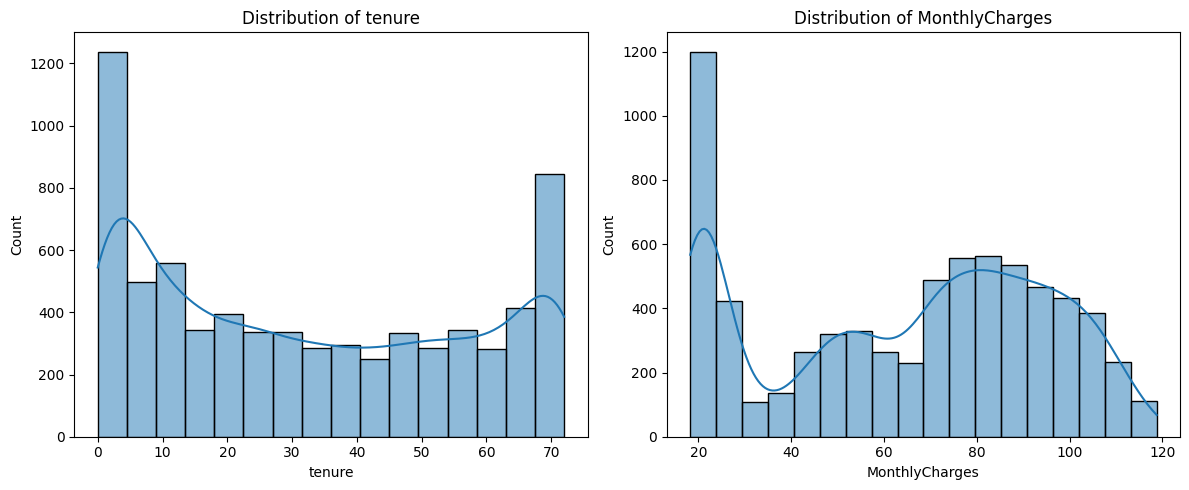


Missing values in TotalCharges after conversion:
11

Filled missing TotalCharges with median value: 1397.475


/tmp/ipython-input-1474785080.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(median_total_charges, inplace=True)


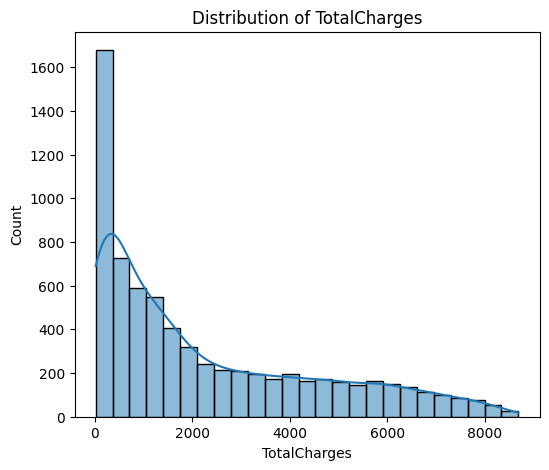

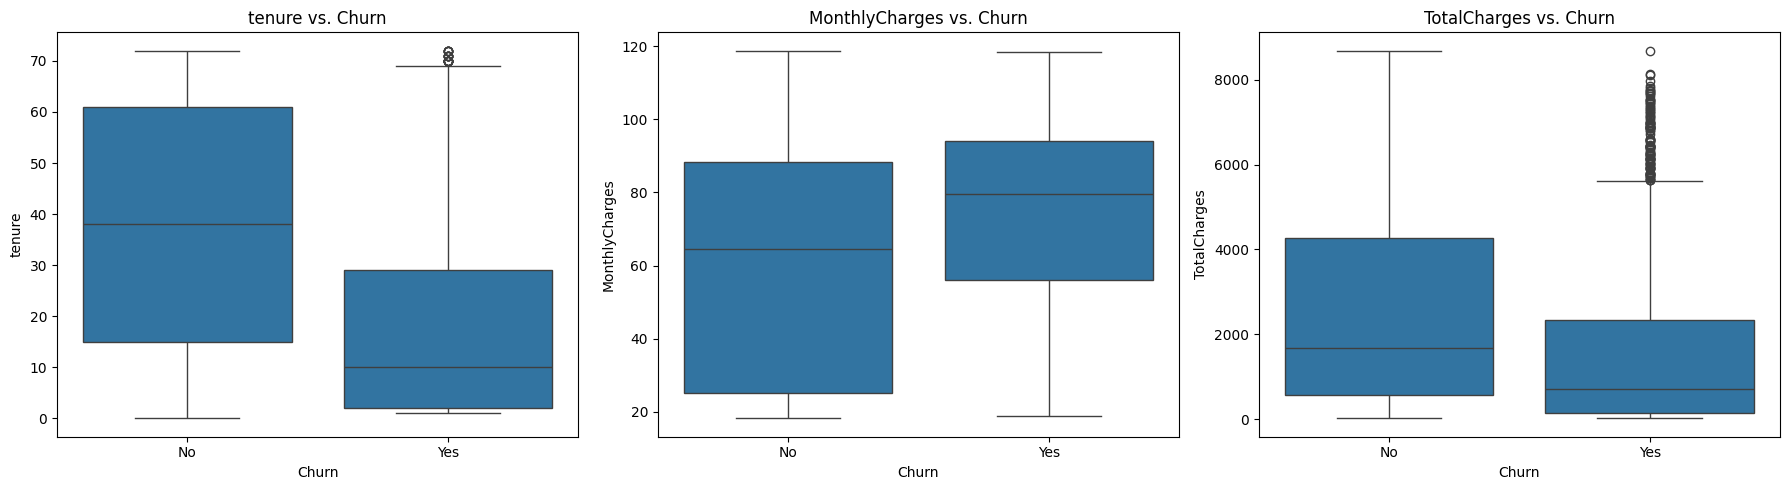

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore distribution of numerical features
numerical_cols = ['tenure', 'MonthlyCharges'] # Excluding TotalCharges for now as it's object type

plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Explore TotalCharges (after handling non-numeric values if necessary)
# As TotalCharges was identified as object type, let's convert it to numeric first
# Handle possible errors during conversion by coercing invalid parsing to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now check for and handle any NaNs introduced by the conversion
print("\nMissing values in TotalCharges after conversion:")
print(df['TotalCharges'].isnull().sum())

# If there are missing values, you might want to fill them (e.g., with the mean or median)
# For this example, let's fill with the median
if df['TotalCharges'].isnull().sum() > 0:
    median_total_charges = df['TotalCharges'].median()
    df['TotalCharges'].fillna(median_total_charges, inplace=True)
    print(f"\nFilled missing TotalCharges with median value: {median_total_charges}")

# Now visualize the distribution of TotalCharges
plt.figure(figsize=(6, 5))
sns.histplot(df['TotalCharges'], kde=True)
plt.title('Distribution of TotalCharges')
plt.show()


# Explore relationship between numerical features and Churn
plt.figure(figsize=(18, 5))
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs. Churn')
plt.tight_layout()
plt.show()

> # **3. Handling Missing Values**

In [ ]:
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())


Missing values before handling:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


> # **4. Data Preprocessing**

> ## **4.1. Categorical Feature Analysis**

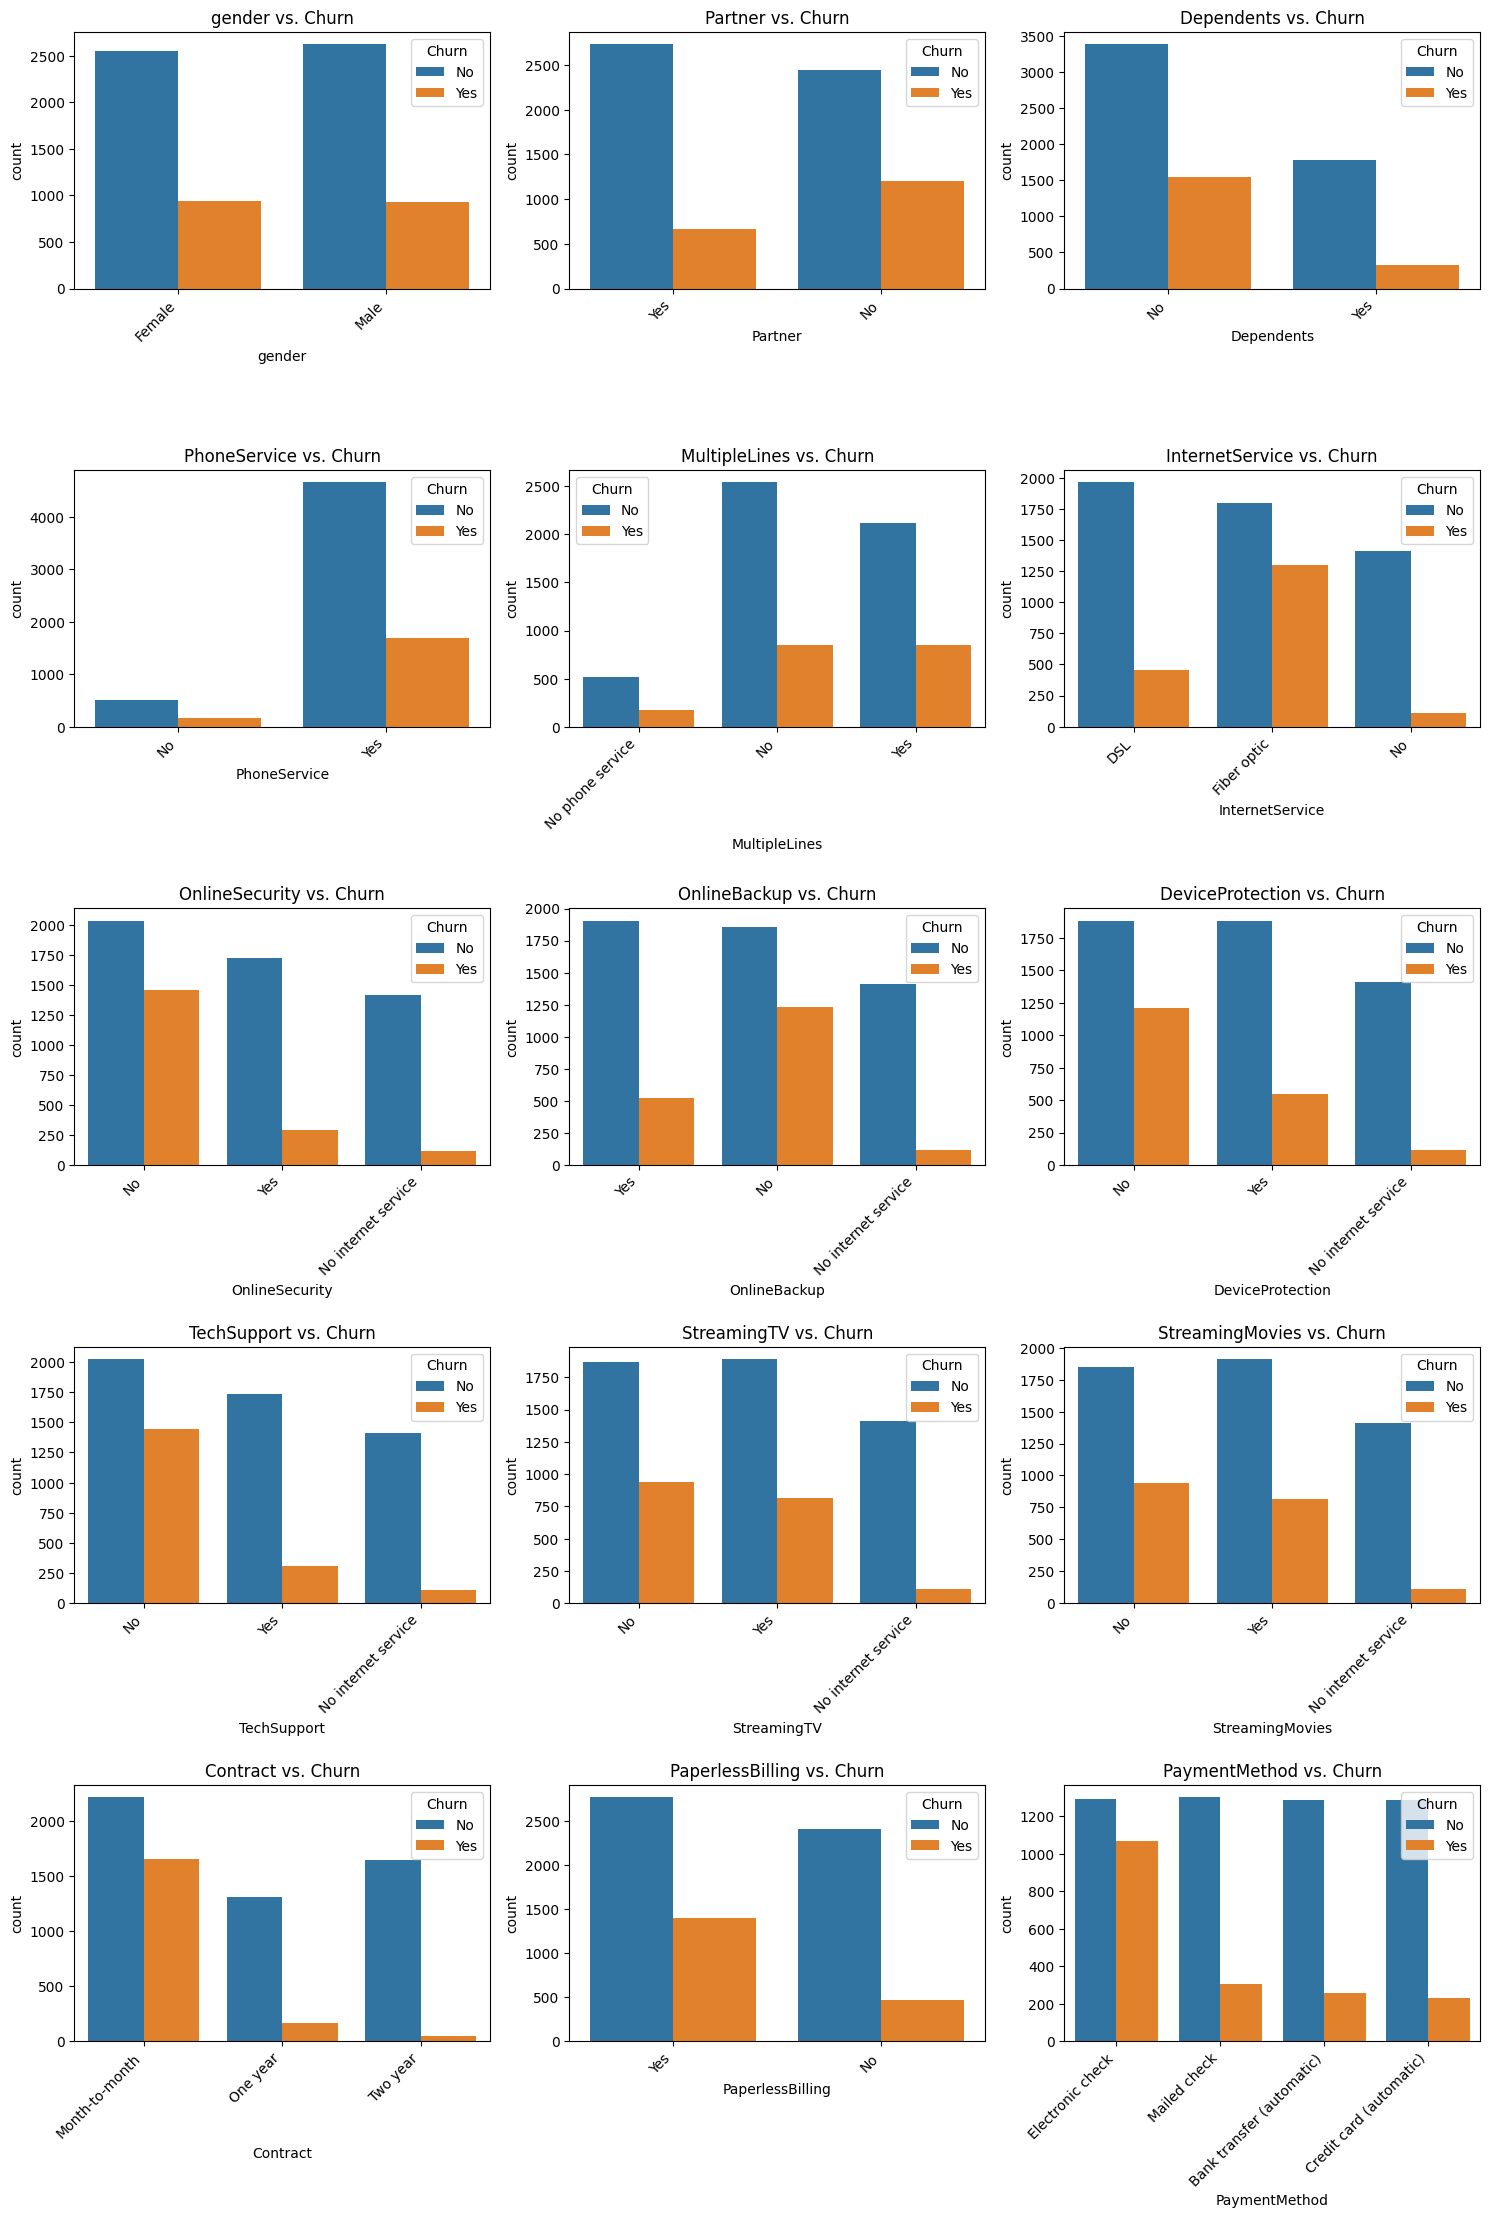

In [ ]:
# Explore relationship between categorical features and Churn

# Get the list of categorical columns from the original dataframe (excluding 'customerID', 'TotalCharges', and 'Churn')
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID')
if 'TotalCharges' in categorical_cols:
    categorical_cols.remove('TotalCharges')
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

# Plot countplots for each categorical feature against Churn
plt.figure(figsize=(15, 25))
for i, col in enumerate(categorical_cols):
    plt.subplot(6, 3, i + 1) # Adjust subplot grid based on the number of categorical columns
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs. Churn')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

plt.tight_layout()
plt.show()

> # **5. Categorical Variable Encoding**

In [ ]:
# Identify categorical columns (object type) excluding 'customerID' and 'TotalCharges' which need different handling
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID')
# 'TotalCharges' was identified as object type but should be numeric, so we will handle it separately later if needed for numerical operations
if 'TotalCharges' in categorical_cols:
    categorical_cols.remove('TotalCharges')
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn') # Exclude the target variable for now

print(f"Categorical columns to encode: {categorical_cols}")

# Apply one-hot encoding to the identified categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded DataFrame
print("\nDataFrame after one-hot encoding:")
display(df_encoded.head())

# Display the data types to see the new columns
print("\nData types after one-hot encoding:")
print(df_encoded.dtypes)

Categorical columns to encode: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

DataFrame after one-hot encoding:


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,0,34,56.95,1889.50,No,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,2,53.85,108.15,Yes,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,0,45,42.30,1840.75,No,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,9237-HQITU,0,2,70.70,151.65,Yes,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False



Data types after one-hot encoding:
customerID                                object
SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                     object
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes             

> # **6. Dataset Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'Churn' is your target variable
X = df_encoded.drop(['customerID', 'Churn'], axis=1) # Features
y = df_encoded['Churn'] # Target

# Convert the target variable to numeric if it's not already (e.g., 'Yes'/'No' to 1/0)
y = y.apply(lambda x: 1 if x == 'Yes' else 0)


# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data splitting complete.")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Data splitting complete.
Training features shape: (5634, 30)
Testing features shape: (1409, 30)
Training target shape: (5634,)
Testing target shape: (1409,)


## Task 1:- completed

- Data Loading
- data exploration
- Handling missing values,
- Data preprocessing,
- Categorical variable encoding,
- Dataset splitting.
            
        



> ## **Correlation Analysis with Target Variable**

Correlation of Numerical Features with Churn:


,Churn
Churn,1.000000
MonthlyCharges,0.193356
TotalCharges,-0.199037
tenure,-0.352229



Correlation of All Features (including encoded categorical) with Churn:


,Churn
Churn,1.000000
InternetService_Fiber optic,0.308020
PaymentMethod_Electronic check,0.301919
MonthlyCharges,0.193356
PaperlessBilling_Yes,0.191825
SeniorCitizen,0.150889
StreamingTV_Yes,0.063228
StreamingMovies_Yes,0.061382
MultipleLines_Yes,0.040102
PhoneService_Yes,0.011942


/tmp/ipython-input-484705980.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_churn_encoded.drop('Churn').values, y=correlation_with_churn_encoded.drop('Churn').index, palette='coolwarm')


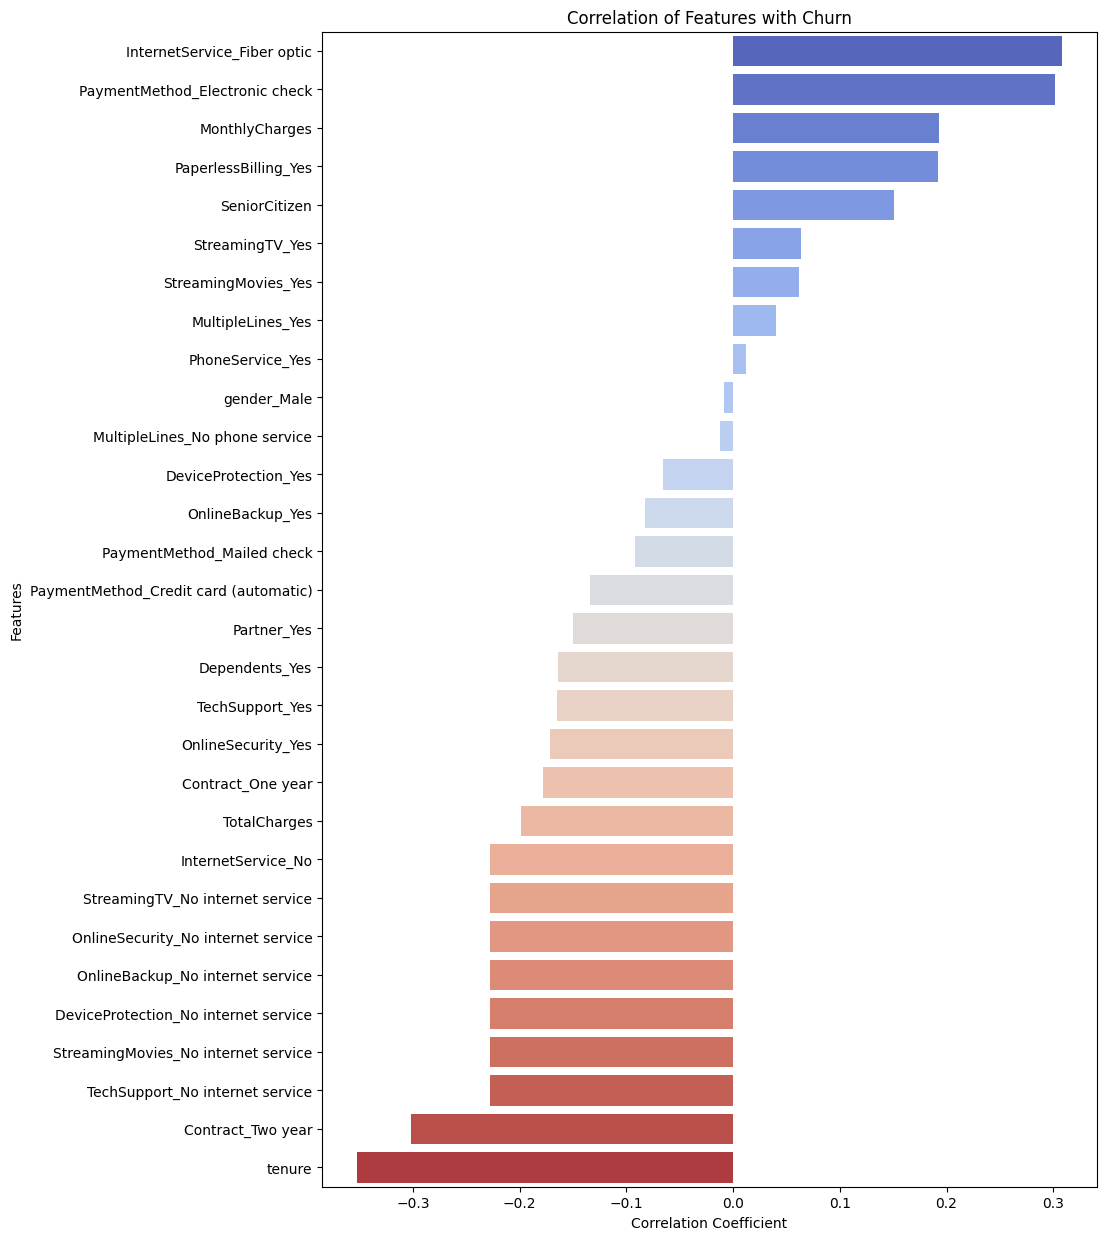

In [ ]:
# Calculate correlation between numerical features and Churn
# Ensure 'Churn' is numeric (which we already did during splitting)
numerical_features_with_churn = df_encoded[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy()
# Explicitly convert 'Churn' to numeric (0 for 'No', 1 for 'Yes')
numerical_features_with_churn['Churn'] = numerical_features_with_churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
correlation_with_churn = numerical_features_with_churn.corr()['Churn'].sort_values(ascending=False)

print("Correlation of Numerical Features with Churn:")
display(correlation_with_churn)

# For categorical features (which are now one-hot encoded and are boolean/numeric),
# we can also look at the correlation with Churn.
# Exclude 'customerID' and the original 'Churn' column from the encoded dataframe
encoded_features_with_churn = df_encoded.drop(['customerID'], axis=1).copy()

# Convert boolean columns to integer (0 or 1) for correlation calculation
for col in encoded_features_with_churn.select_dtypes(include='bool').columns:
    encoded_features_with_churn[col] = encoded_features_with_churn[col].astype(int)

# Explicitly convert 'Churn' to numeric (0 for 'No', 1 for 'Yes')
encoded_features_with_churn['Churn'] = encoded_features_with_churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


correlation_with_churn_encoded = encoded_features_with_churn.corr()['Churn'].sort_values(ascending=False)

print("\nCorrelation of All Features (including encoded categorical) with Churn:")
display(correlation_with_churn_encoded)

# Visualize the correlation of all features with Churn (excluding Churn itself from the plot)
plt.figure(figsize=(10, 15))
sns.barplot(x=correlation_with_churn_encoded.drop('Churn').values, y=correlation_with_churn_encoded.drop('Churn').index, palette='coolwarm')
plt.title('Correlation of Features with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

> ## **Correlation Analysis of Numerical Features**

Correlation Matrix of Numerical Features:


,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825464
MonthlyCharges,0.247900,1.000000,0.650864
TotalCharges,0.825464,0.650864,1.000000


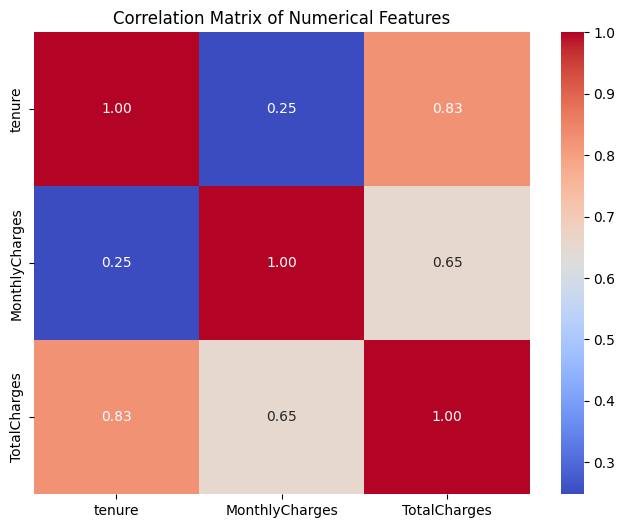

In [ ]:
# Select only numerical columns for correlation analysis
# Ensure 'TotalCharges' is numeric before calculating correlation
numerical_df = df[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print("Correlation Matrix of Numerical Features:")
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

> ### **Relationship between specific pairs of features**

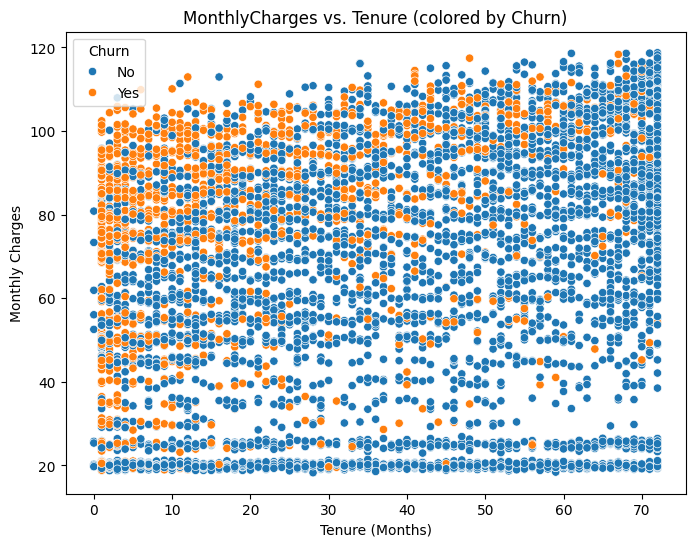

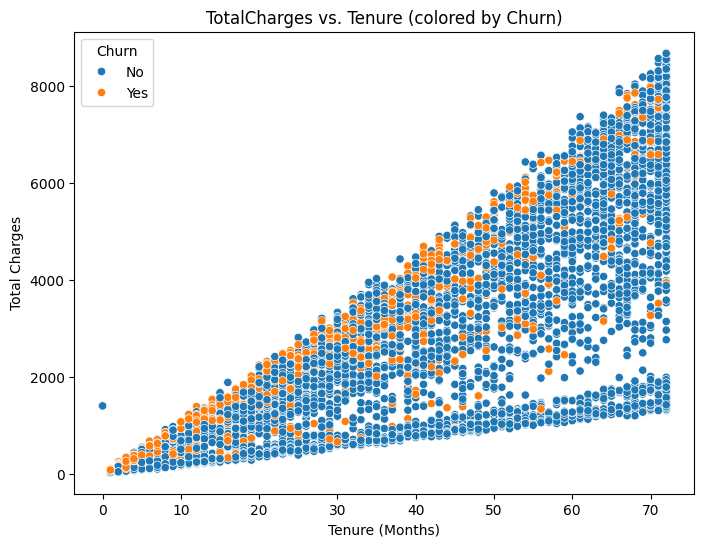

In [ ]:
# Visualize the relationship between MonthlyCharges and Tenure
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title('MonthlyCharges vs. Tenure (colored by Churn)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.show()

# Visualize the relationship between TotalCharges and Tenure
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df)
plt.title('TotalCharges vs. Tenure (colored by Churn)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Total Charges')
plt.show()

# **Task 2: Exploratory Data Analysis (EDA)**
- **Description:**

    Calculate and visually represent the overall
    churn rate. Explore customer distribution by
    gender, partner status, and dependent status.
    Analyze tenure distribution and its relation
    with churn. Investigate how churn varies
    across different contract types and payment
    methods.
- **Skills:**
    1. Data visualization,
    2. statistical analysis,
    3. Exploratory data analysis,
    4. Understanding of customer demographic variables
    5. Churn rate calculation.


> # **Calculate churn rate**

In [ ]:
# Calculate churn rate
churn_rate = df['Churn'].value_counts(normalize=True)['Yes'] * 100
print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 26.54%


> ## **Explore customer distribution by gender, partner status, and dependent status**

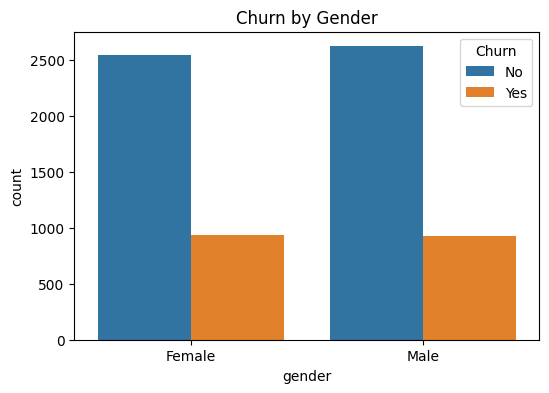

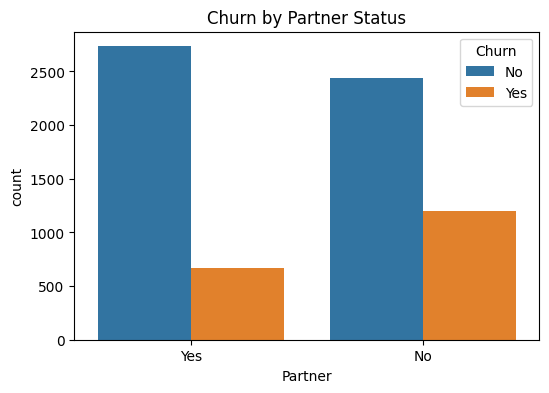

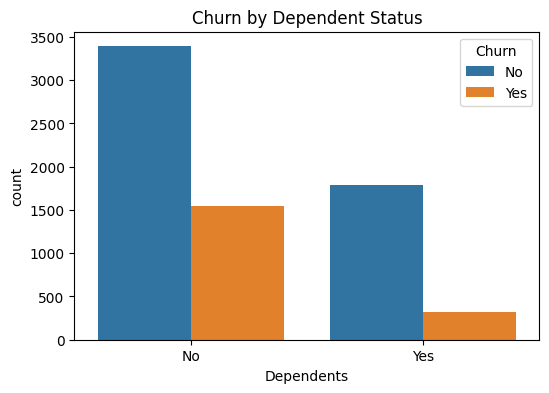

In [ ]:
# Explore customer distribution by gender
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.show()

# Explore customer distribution by partner status
plt.figure(figsize=(6, 4))
sns.countplot(x='Partner', hue='Churn', data=df)
plt.title('Churn by Partner Status')
plt.show()

# Explore customer distribution by dependent status
plt.figure(figsize=(6, 4))
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.title('Churn by Dependent Status')
plt.show()

> ## **Analyze tenure distribution and its relation with churn**



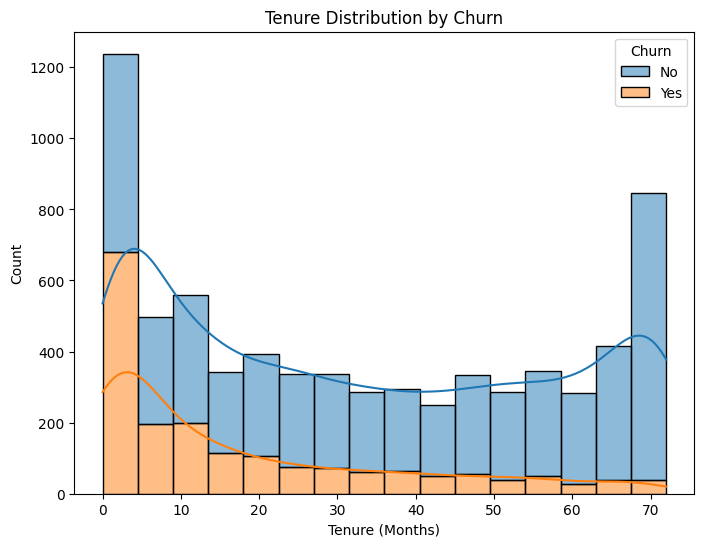

In [ ]:
# Analyze tenure distribution and its relation with churn
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

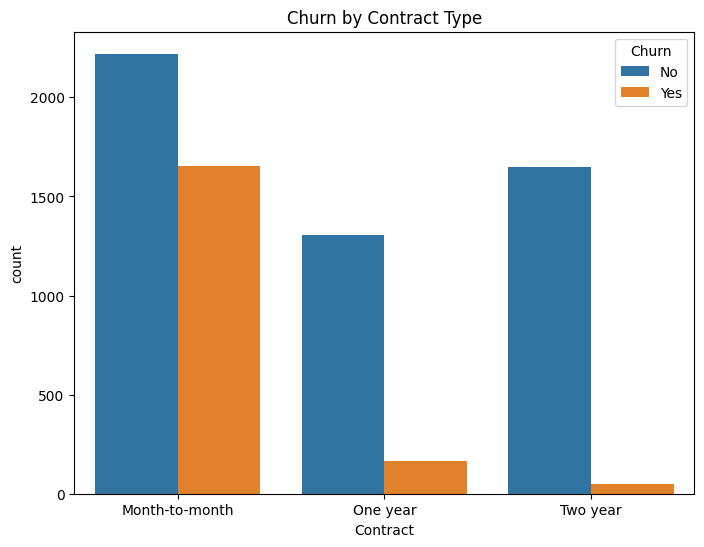

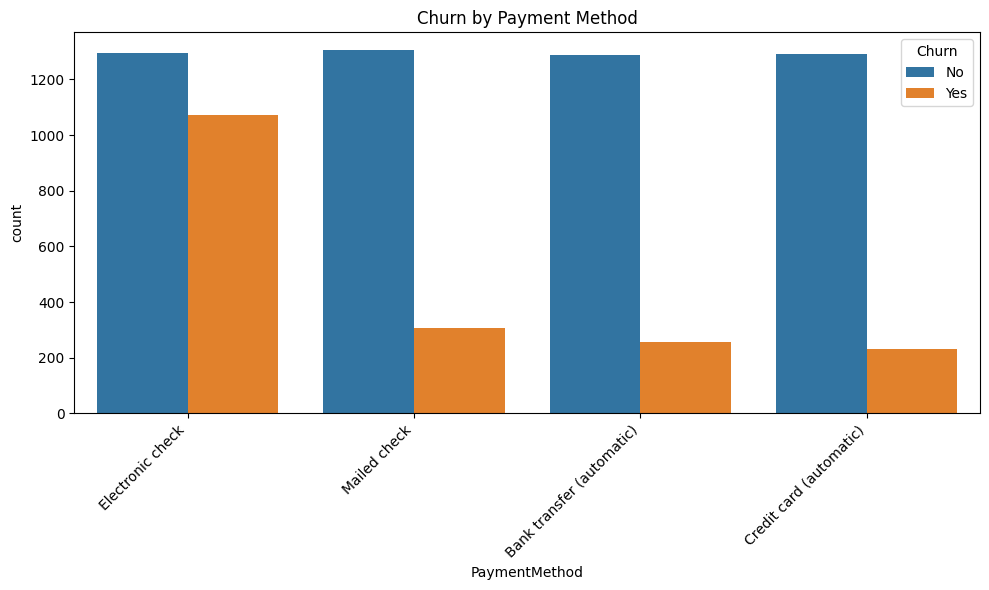

In [ ]:
# Investigate how churn varies across different contract types
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

# Investigate how churn varies across different payment methods
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Method')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Task 2: Complteted!

1. Calculate and visually represent the overall churn rate.
2. Explore customer distribution by gender,
3. partner status, and dependent status.
4. Analyze tenure distribution and its relation with churn.
5. Investigate how churn varies across different contract types and payment methods.

# **Task 3: Customer Segmentation**

> ## **Description:**

Segment customers based on tenure, monthly charges, and contract type. Analyze
churn rates within these segments. Identify
high-value customers who are at risk of
churning and might need special attention.

> ## **Skill**
1.   Segmentation techniques
2.   Understanding of customer behavior

3.   Churn analysis within segments
4.   Identifying high-value customers.

> ## **Segment customers based on tenure, monthly charges, and contract type**

In [ ]:
# Segment based on tenure
# Let's define tenure segments (e.g., short-term, medium-term, long-term)
df['Tenure_Segment'] = pd.cut(df['tenure'], bins=[0, 12, 36, 72], labels=['0-12', '13-36', '37-72'], right=False)

# Segment based on monthly charges
# Let's define monthly charges segments (e.g., low, medium, high)
df['MonthlyCharges_Segment'] = pd.cut(df['MonthlyCharges'], bins=[0, 30, 70, 120], labels=['Low', 'Medium', 'High'], right=False)

# Segment based on contract type (already a categorical column)

# Display the first few rows with new segments
print("DataFrame with Segmentation Columns:")
display(df[['tenure', 'Tenure_Segment', 'MonthlyCharges', 'MonthlyCharges_Segment', 'Contract', 'Churn']].head())

DataFrame with Segmentation Columns:


,tenure,Tenure_Segment,MonthlyCharges,MonthlyCharges_Segment,Contract,Churn
0,1,0-12,29.85,Low,Month-to-month,No
1,34,13-36,56.95,Medium,One year,No
2,2,0-12,53.85,Medium,Month-to-month,Yes
3,45,37-72,42.30,Medium,One year,No
4,2,0-12,70.70,High,Month-to-month,Yes


> ## **Analyze churn rates within these segments**

In [ ]:
# Analyze churn rate by Tenure Segment
print("\nChurn Rate by Tenure Segment:")
display(df.groupby('Tenure_Segment')['Churn'].value_counts(normalize=True).unstack().mul(100).fillna(0))

# Analyze churn rate by Monthly Charges Segment
print("\nChurn Rate by Monthly Charges Segment:")
display(df.groupby('MonthlyCharges_Segment')['Churn'].value_counts(normalize=True).unstack().mul(100).fillna(0))

# Analyze churn rate by Contract Type
print("\nChurn Rate by Contract Type:")
display(df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().mul(100).fillna(0))

# Analyze churn rate by combined segments (e.g., Tenure and Monthly Charges)
print("\nChurn Rate by Tenure and Monthly Charges Segments:")
display(df.groupby(['Tenure_Segment', 'MonthlyCharges_Segment'])['Churn'].value_counts(normalize=True).unstack().mul(100).fillna(0))

# Analyze churn rate by combined segments (e.g., Contract and Monthly Charges)
print("\nChurn Rate by Contract Type and Monthly Charges Segments:")
display(df.groupby(['Contract', 'MonthlyCharges_Segment'])['Churn'].value_counts(normalize=True).unstack().mul(100).fillna(0))


Churn Rate by Tenure Segment:


/tmp/ipython-input-391087426.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('Tenure_Segment')['Churn'].value_counts(normalize=True).unstack().mul(100).fillna(0))


Churn,No,Yes
Tenure_Segment,,
0-12,51.715805,48.284195
13-36,73.894956,26.105044
37-72,86.537746,13.462254



Churn Rate by Monthly Charges Segment:


/tmp/ipython-input-391087426.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('MonthlyCharges_Segment')['Churn'].value_counts(normalize=True).unstack().mul(100).fillna(0))


Churn,No,Yes
MonthlyCharges_Segment,,
Low,90.199637,9.800363
Medium,75.931073,24.068927
High,64.522417,35.477583



Churn Rate by Contract Type:


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858



Churn Rate by Tenure and Monthly Charges Segments:


/tmp/ipython-input-391087426.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby(['Tenure_Segment', 'MonthlyCharges_Segment'])['Churn'].value_counts(normalize=True).unstack().mul(100).fillna(0))


Churn                                         No        Yes
Tenure_Segment MonthlyCharges_Segment                      
0-12           Low                     76.666667  23.333333
               Medium                  55.988024  44.011976
               High                    31.167268  68.832732
13-36          Low                     95.414847   4.585153
               Medium                  82.950192  17.049808
               High                    58.430541  41.569459
37-72          Low                     98.568873   1.431127
               Medium                  91.327434   8.672566
               High                    80.511182  19.488818


Churn Rate by Contract Type and Monthly Charges Segments:


/tmp/ipython-input-391087426.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby(['Contract', 'MonthlyCharges_Segment'])['Churn'].value_counts(normalize=True).unstack().mul(100).fillna(0))


Churn                                         No        Yes
Contract       MonthlyCharges_Segment                      
Month-to-month Low                     77.102804  22.897196
               Medium                  64.836138  35.163862
               High                    47.195817  52.804183
One year       Low                     97.311828   2.688172
               Medium                  92.167102   7.832898
               High                    82.451253  17.548747
Two year       Low                     99.217527   0.782473
               Medium                  97.909408   2.090592
               High                    95.188557   4.811443

> ## **Identify high-value customers who are at risk of churning**

In [ ]:
# To identify high-value customers, we can consider those with high TotalCharges and potentially long tenure.
# Customers at risk of churning are those with Churn == 'Yes'.

# Let's define 'High Value' customers as those in the top 25% of TotalCharges
high_value_threshold = df['TotalCharges'].quantile(0.75)
high_value_customers = df[df['TotalCharges'] >= high_value_threshold]

# Identify high-value customers who are at risk of churning
high_value_churn_risk = high_value_customers[high_value_customers['Churn'] == 'Yes']

print(f"\nNumber of high-value customers (Top 25% TotalCharges): {len(high_value_customers)}")
print(f"Number of high-value customers at risk of churning: {len(high_value_churn_risk)}")

print("\nHigh-Value Customers at Risk of Churning (first 10):")
display(high_value_churn_risk.head(10))

# You can further analyze the characteristics of these high-value, high-risk customers
# For example, their contract type, internet service, etc.
print("\nDistribution of Contract Type among High-Value Churn-Risk Customers:")
display(high_value_churn_risk['Contract'].value_counts(normalize=True).mul(100))

print("\nDistribution of Internet Service among High-Value Churn-Risk Customers:")
display(high_value_churn_risk['InternetService'].value_counts(normalize=True).mul(100))


Number of high-value customers (Top 25% TotalCharges): 1761
Number of high-value customers at risk of churning: 255

High-Value Customers at Risk of Churning (first 10):


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Segment,MonthlyCharges_Segment
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,37-72,High
26,6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,37-72,High
104,3192-NQECA,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,Yes,37-72,High
110,0486-HECZI,Male,0,Yes,No,55,Yes,Yes,Fiber optic,Yes,...,Yes,No,Month-to-month,Yes,Electronic check,96.75,5238.90,Yes,37-72,High
173,0691-JVSYA,Female,0,Yes,No,53,Yes,No,Fiber optic,No,...,Yes,Yes,One year,Yes,Bank transfer (automatic),94.85,5000.20,Yes,37-72,High
276,4484-GLZOU,Female,0,Yes,No,52,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,105.05,5624.85,Yes,37-72,High
320,5020-ZSTTY,Female,1,No,No,54,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,No,Bank transfer (automatic),82.45,4350.10,Yes,37-72,High
335,4322-RCYMT,Male,0,Yes,Yes,68,Yes,Yes,DSL,No,...,No,Yes,One year,Yes,Bank transfer (automatic),75.80,5293.95,Yes,37-72,High
336,6680-NENYN,Female,0,No,No,43,Yes,Yes,Fiber optic,No,...,Yes,Yes,Two year,Yes,Electronic check,104.60,4759.85,Yes,37-72,High
339,1343-EHPYB,Male,0,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,103.40,6603.00,Yes,37-72,High



Distribution of Contract Type among High-Value Churn-Risk Customers:


,proportion
Contract,
Month-to-month,50.588235
One year,34.509804
Two year,14.901961



Distribution of Internet Service among High-Value Churn-Risk Customers:


,proportion
InternetService,
Fiber optic,94.509804
DSL,5.490196


## Task 3: Completed!
- Segment customers based on tenure, monthly charges, and contract type.
- Analyze churn rates within these segments.
- Identify high-value customers who are at risk of churning and might need special attention.

# ***Task 4: Churn Prediction Model***

> ## **3. Model Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grids for tuning
# Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

# Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7]
}

# Perform GridSearchCV for each model
tuned_results = {}

print("Starting Hyperparameter Tuning...")

# Logistic Regression Tuning
print("\nTuning Logistic Regression...")
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='roc_auc')
grid_search_lr.fit(X_train, y_train)
tuned_results['Logistic Regression (Tuned)'] = grid_search_lr.best_score_
print(f"Best parameters for Logistic Regression: {grid_search_lr.best_params_}")
print(f"Best AUC for Logistic Regression (Tuned): {grid_search_lr.best_score_:.4f}")

# Random Forest Tuning
print("\nTuning Random Forest...")
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')
grid_search_rf.fit(X_train, y_train)
tuned_results['Random Forest (Tuned)'] = grid_search_rf.best_score_
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best AUC for Random Forest (Tuned): {grid_search_rf.best_score_:.4f}")


# Gradient Boosting Tuning
print("\nTuning Gradient Boosting...")
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='roc_auc')
grid_search_gb.fit(X_train, y_train)
tuned_results['Gradient Boosting (Tuned)'] = grid_search_gb.best_score_
print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Best AUC for Gradient Boosting (Tuned): {grid_search_gb.best_score_:.4f}")

print("\nHyperparameter Tuning Complete.")
print("\nTuned Model AUC Scores:")
display(pd.Series(tuned_results).sort_values(ascending=False))

Starting Hyperparameter Tuning...

Tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 100, 'solver': 'lbfgs'}
Best AUC for Logistic Regression (Tuned): 0.8410

Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 500}
Best AUC for Random Forest (Tuned): 0.8406

Tuning Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Best AUC for Gradient Boosting (Tuned): 0.8439

Hyperparameter Tuning Complete.

Tuned Model AUC Scores:


,0
Gradient Boosting (Tuned),0.843916
Logistic Regression (Tuned),0.841041
Random Forest (Tuned),0.840625


> ## ***Description:***
Choose suitable machine learning algorithms
(e.g., logistic regression, decision trees) for
churn prediction. Split data into training and
testing sets, train and evaluate multiple
models using metrics like accuracy, precision,
recall, and F1-score. Perform feature selection
and hyperparameter tuning for optimal
performance.

> ## **Skills**
1. Machine learning algorithms
2. Model training and evaluation,
3. Feature selection, hyperparameter tuning
4. Understanding of classification metrics.